In [10]:
import sys
import os
sys.path.append(os.path.abspath(r"c:\Users\Amir\Desktop\SDSS-Project\Python_Codes\RLagent.ipynb"))
from Python_Codes import RLagent as rlagent
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.markers as mks
import numpy as np
import pprint
import random as rn
from itertools import chain
import math

ModuleNotFoundError: No module named 'Python_Codes'

In [4]:
print(os.getcwd()) 

c:\Users\Amir\Desktop\SDSS-Project\Python_Codes


In [ ]:
# Parameters of Reinforcement Learning
cRange = np.array(range(1, 10))/10
mRange = np.array(range(1, 10))/10
alpha = 0.7
gamma = 0.1
epsilon = 0.3
crossover = 0.8
mutation = 0.2
agent = rlagent(alpha, gamma, epsilon, cRange, mRange, crossover, mutation)


In [3]:
# Parameters for standard configuration
NT = 400  # total number of TDR facilities available
ST = 0.975 # safety level threshold
M = 10**6  # total demands threshold
L = 1000  # Lambda: scaling factor for total number of facilities opened
A = 10  # Alpha: maximum number of neighborhoods that a neighborhood can serve
B = 10  # Beta: maximum number of neighborhoods that a neighborhood can be served by
G = 15  # Gamma: penalty for unit unmet demand
k = ["Water", "Food", "Medical Kit"]  # commodities type
v = dict(zip(k, [1, 1, 0.5]))  # unit volume of commodity k
w = dict(zip(k, [1, 0.25, 0.25]))  # unit weight of commodity k
cd = dict(zip(k, [2.5, 3, 0.333]))  # commodities demand of an injured in 1day
V = 34560*5 # Volume Capacity of TDR
W = 30480 # Weight Capacity of TDR

In [4]:
# Reading the File
n = [] # maximum number of TDR facilities that can be allocated in neighborhood i
s = [] # safety level of neighborhood i
runstep = 0
elite_Chromosoms = []
elites_fitness = math.inf
x_nodes = []
y_nodes = []
No_nodes = 0 #number of nodes
No_supplierNodes = 0 # number of supplier nodes
No_demandNodes = 0 #number of demand nodes
supplier_nodes_index = []
demand_nodes_index = []
v_capacity = [] # volume capacity
w_capacity = [] # weight capacity
v_demands = [] # volume demands
w_demands = [] # weight demands
dist = [] # distance between neighborhoods i and j
def readfile(path: str):
    global No_nodes, No_supplierNodes, No_demandNodes, supplier_nodes_index, demand_nodes_index, n, v_demands
    with open(path, "r") as file:
        lines = file.readlines()
    # print(lines)
    for i, line in enumerate(lines, start=1):
        if 2 < i:
            NodesAttributes = line.split(",")
            x_nodes.append(float(NodesAttributes[7]))
            y_nodes.append(float(NodesAttributes[8]))
            population = int(NodesAttributes[4])
            No_facility = int(NodesAttributes[6])
            n.append(No_facility)
            s.append(float(NodesAttributes[5]))
            v_capacity.append(V*(No_facility))
            w_capacity.append(W*No_facility)
            v_demands.append(sum([x * y * population for x, y in zip(list(v.values()), list(cd.values()))]))
            w_demands.append(sum([x * y * population for x, y in zip(list(w.values()), list(cd.values()))]))
    print("x_nodes = ", x_nodes, "\ny_nodes = ", y_nodes, "\nv_capacity = ",
        v_capacity, "\nw_capacity = ", w_capacity, "\nv_demands = ",
        v_demands, "\nw_demands =", w_demands, "\nSafty Levels = ", s)
    
    print("\nSumVolumeCapacities = ", sum(v_capacity), "\nSumWeightCapacities = ", sum(w_capacity),
          "\nSumVolumeDemands = ", sum(v_demands), "\nSumWeightDemands = ", sum(w_demands))

    No_nodes = len(x_nodes)
    supplier_nodes_index = [index for index, s in enumerate(s) if s >= ST]
    demand_nodes_index = [index for index, s in enumerate(s) if s < ST]
    No_supplierNodes = len(supplier_nodes_index)
    No_demandNodes = len(demand_nodes_index)
    print("\nNum of Nodes = ",No_nodes,
          "\nNum of Spplier Nodes = ", No_supplierNodes,
          "\nNum of demand Nodes = ", No_demandNodes,
          "\nSupplier Nodes Index = ", supplier_nodes_index,
          "\nDemand Nodes Index = ", demand_nodes_index)
    

readfile("C:\\Users\\Amir\\Desktop\\SDSS-Project\\Data\\Neighborhood_Data.txt")    

x_nodes =  [542854.6354575139, 544297.7334397715, 544944.215181266, 545825.418826526, 541240.2444018908, 539921.3650180083, 540175.8892363384, 540605.2459170669, 539128.6217184188, 537574.0052861953, 541602.5902471552, 542304.9197994834, 542259.151118977, 541522.5829327758, 546184.1424427144, 544978.7931347527, 545663.0204727789, 547881.51214989, 538914.6155979317, 534686.893008735, 543518.8594746208, 547080.3030648893, 541319.7851449214, 543220.0095095076, 542405.1251548771, 544162.6504610088, 550893.5400929973, 546508.6861207737, 548245.1148169972, 549254.8346710587, 548105.9195804857, 545616.740718483, 546071.1267206725, 543305.90639506, 545292.4495104905, 545082.5480190925, 549457.8557848195, 550944.8534072414, 552475.7698982758, 549675.2819713792, 547310.3965815576, 536145.5420112209, 535431.0558279892, 537240.8895195238, 539381.1751644257, 546648.7023844942, 539127.8325918401, 538275.1273844559, 537466.9793481054, 542635.9756636173, 540088.92828108, 541162.2788729379, 535553.4739

In [5]:
def DistMatrix():
    distmatrix = np.empty((No_nodes, No_nodes), dtype=float)
    for i in range(No_nodes):
        for j in range(No_nodes):
            distmatrix[i][j] = round(math.sqrt( pow(x_nodes[i]-x_nodes[j],2) + pow(y_nodes[i]-y_nodes[j],2)), 2)
    return distmatrix
distmatrix = DistMatrix()
pprint.pprint(distmatrix)

array([[    0.  ,  1517.52,  2162.  , ...,  9381.41,  8914.95, 10377.78],
       [ 1517.52,     0.  ,   652.11, ..., 10371.91, 10216.28, 11687.02],
       [ 2162.  ,   652.11,     0.  , ..., 10745.77, 10729.68, 12201.25],
       ...,
       [ 9381.41, 10371.91, 10745.77, ...,     0.  ,  3100.57,  3609.36],
       [ 8914.95, 10216.28, 10729.68, ...,  3100.57,     0.  ,  1471.57],
       [10377.78, 11687.02, 12201.25, ...,  3609.36,  1471.57,     0.  ]])


In [6]:
# Initial Population
Population = []
def generate_initial_population(pop_size):
    for ـ in range(pop_size):
        Chromosom = []
        selectable = demand_nodes_index.copy()
        for i in range(No_nodes):
            if (i <= No_demandNodes-1):
                j = rn.choice(selectable)
                selectable.remove(j)
            else:
                j = rn.choice(range(min(n),n[supplier_nodes_index[i-No_demandNodes]]+1))
            Chromosom.append(j)
        Population.append(Chromosom)
    return Population
Population = generate_initial_population(100)
# print(Population)

In [7]:

# Fitness
def distance(pop: list):
    distance_fitness = []
    d_supp = np.array([v_demands[s] for s in supplier_nodes_index])
    c_supp = np.array([i*V  for i in pop[No_demandNodes:]])- d_supp
    d = np.array([v_demands[i] for i in demand_nodes_index])
    j = 0
    end = False
    for i in range(No_supplierNodes):
        while c_supp[i] >= d[j]:
            distance_fitness.append(distmatrix[supplier_nodes_index[i], pop[j]])
            c_supp[i] -= d[j]
            d[j] = 0
            j += 1
            if j == No_demandNodes:
                end = True
                break
        if end == True:
            break
        d[j] -= c_supp[i]
        c_supp[i] = 0
    return sum(distance_fitness)
def fitness(population: list):
    global elite_Chromosoms, elites_fitness
    Fitness = []
    for pop in population:
        
        sum_facilities_fitness = sum(pop[No_demandNodes:])
        
        d = sum(v_demands)
        c = sum([V*i for i in pop[No_demandNodes:]])
        if d-c > 0:
            unmet_demand_fitness = (d-c)
        else:
            unmet_demand_fitness = 0
        
        distance_fitness = distance(pop)

            
        Fitness.append(sum_facilities_fitness*L + unmet_demand_fitness*G + distance_fitness)
    if min(Fitness) < elites_fitness:
        elites_fitness = min(Fitness)
        elite_Chromosoms = Population[Fitness.index(min(Fitness))]
    return Fitness
# Fitness = fitness(Population)
# print(Fitness)

In [8]:
# Split Rank Selection
changed = False
Ranking = range(1,len(Population)+1)
K = len(Ranking)
ChromosomsProb =[]
ProbsRange = []
for i in Ranking:
    if i <= K/2:
        ChromosomsProb.append((12*i)/(5*K*(K+2)))
    else:
        ChromosomsProb.append((28*i)/(5*K*(3*K+2)))
for index, i in enumerate(ChromosomsProb):
    if index == 0:
        ProbsRange.append([0,i])
    else:
        ProbsRange.append([ProbsRange[index-1][1], ProbsRange[index-1][1] + (i)])  
def SRS_Selection(ChromosomsFitness: list):
    global runstep, ProbsRange, changed
    # runstep += 1
    # if changed == False:
    #     if runstep > 500:
    #         ChromosomsProb =[]
    #         ProbsRange = []
    #         for i in Ranking:
    #             if i <= K/2:
    #                 ChromosomsProb.append((12*i)/(5*K*(K+2)))
    #             else:
    #                 ChromosomsProb.append((28*i)/(5*K*(3*K+2)))
    #         for index, i in enumerate(ChromosomsProb):
    #             if index == 0:
    #                 ProbsRange.append([0,i])
    #             else:
    #                 ProbsRange.append([ProbsRange[index-1][1], ProbsRange[index-1][1] + (i)]) 
    #         changed = True
            
    selectedchromosomforcrossover = []
    SelectedChromosomForCrossOver = []
    if elites_fitness not in ChromosomsFitness: 
        Population[rn.randint(0,len(Population)-1)] = elite_Chromosoms
    ChromosomsFitnessSorted = sorted(ChromosomsFitness, reverse=True)
    ChromosomsIndexByFitness = [ChromosomsFitness.index(i) for i in ChromosomsFitnessSorted]
    for _ in Ranking:
        r = rn.uniform(0,1)
        for index, j in enumerate(ProbsRange):
            if r > j[0] and r <= j[1]:
                selectedchromosomforcrossover.append(ChromosomsIndexByFitness[index])
                if len(selectedchromosomforcrossover) == 2:
                    SelectedChromosomForCrossOver.append(selectedchromosomforcrossover)
                    selectedchromosomforcrossover = []
                    break
    # print(f"SelectedChromosomForCrossOver length = {len(SelectedChromosomForCrossOver)}")
    return SelectedChromosomForCrossOver
# selectedChromosom = SRS_Selection(Fitness)
# print(selectedChromosom)

[0.0031249076127124907, 0.00314560236511456, 0.00316629711751663, 0.0031869918699186993, 0.0032076866223207687, 0.003228381374722838, 0.0032490761271249074, 0.0032697708795269773, 0.0032904656319290466, 0.003311160384331116, 0.0033318551367331854, 0.003352549889135255, 0.0033732446415373246, 0.003393939393939394, 0.0034146341463414634, 0.003435328898743533, 0.003456023651145602, 0.003476718403547672, 0.0034974131559497414, 0.003518107908351811, 0.00353880266075388, 0.0035594974131559496, 0.0035801921655580194, 0.0036008869179600888, 0.003621581670362158, 0.0036422764227642276, 0.003662971175166297, 0.0036836659275683668, 0.003704360679970436, 0.0037250554323725055, 0.003745750184774575, 0.0037664449371766443, 0.003787139689578714, 0.0038078344419807835, 0.003828529194382853, 0.0038492239467849223, 0.0038699186991869917, 0.0038906134515890615, 0.003911308203991131, 0.0039320029563932, 0.00395269770879527, 0.003973392461197339, 0.0039940872135994085, 0.004014781966001478, 0.0040354767184

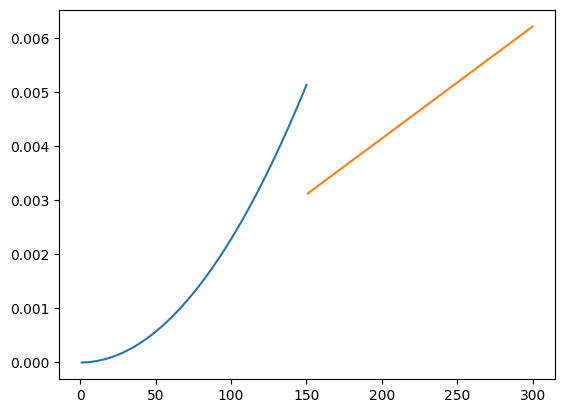

In [9]:
i = np.array(list(range(1, 151)))
h1 = []
K = 300
for j in i:
    h1.append((12*j)**2/(4.1*K*(K+2))**1.58)
plt.plot(i,h1)

i = np.array(list(range(151, 301)))
h2 = []
for j in i:
    h2.append((28*j)/(5*K*(3*K+2)))
print(h2)
plt.plot(i,h2)

In [10]:
# Partial Mapped Crossover
def PMX_Crossover(selectedcrossover):
    childs = []
    for i in selectedcrossover:
        r = rn.uniform(0,1)
        if r <= 0.8:
            p1 = Population[i[0]]
            p2 = Population[i[1]]
            child1 = [1]*len(p1)
            child2 = [1]*len(p1)
            crossoverindex = rn.sample(list(range(No_demandNodes)),2)
            bp1 = p1[min(crossoverindex):max(crossoverindex)+1]
            bp2 = p2[min(crossoverindex):max(crossoverindex)+1]
            child1[min(crossoverindex):max(crossoverindex)+1] = bp2.copy()
            child2[min(crossoverindex):max(crossoverindex)+1] = bp1.copy()
            Chain = chain(range(min(crossoverindex)), range(max(crossoverindex)+1, len(child1)))
            for j in Chain:
                chekpoint1 = p1[j]
                chekpoint2 = p2[j]
                m = 0
                ch = False
                while chekpoint1 in bp2:
                    m += 1
                    chekpoint1 = bp1[bp2.index(chekpoint1)]
                    if m > len(bp2):
                        ch = True
                        child1[j] = p2[j]
                        break
                if ch == False:
                    child1[j] = chekpoint1
                m = 0
                ch = False
                while chekpoint2 in bp1:
                    m += 1
                    chekpoint2 = bp2[bp1.index(chekpoint2)]
                    if m > len(bp1):
                        ch = True
                        child2[j] = p1[j]
                        break
                if ch == False:
                    child2[j] = chekpoint2
                
                
            for index, i in enumerate(p2[No_demandNodes:]):
                child1[No_demandNodes+index] = i
                child2[No_demandNodes+index] = p1[No_demandNodes+index]
                
            childs.append(child1)
            childs.append(child2)
            
        else:
            childs.append(Population[i[0]])
            childs.append(Population[i[1]])
    return childs

In [11]:
# Mutation
def Mutation(childs: list):
    childsaftermutation = []
    for i in childs:
        r = rn.uniform(0,1)
        if r <= 0.2:
            rnd = rn.sample(list(range(No_demandNodes)),2)
            rnd0 = i[rnd[0]]
            rnd1 = i[rnd[1]]
            i[rnd[0]] = rnd1
            i[rnd[1]] = rnd0
            childsaftermutation.append(i)
            
            # rnd = rn.sample(list(range(No_demandNodes, len(i))),2)
            # rnd0 = i[rnd[0]]
            # rnd1 = i[rnd[1]]
            # if n[rnd[1]] > rnd0 and n[rnd[0]] > rnd1:
            #     i[rnd[0]] = rnd1
            #     i[rnd[1]] = rnd0
            # childsaftermutation.append(i)
        else:
            childsaftermutation.append(i)
    return childsaftermutation
# mutation = Mutation(childs)
# print(mutation)

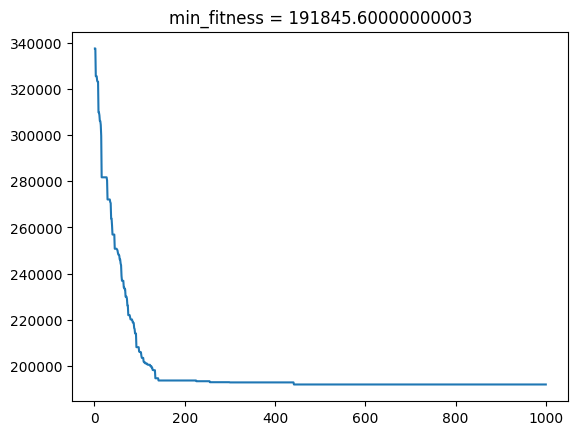

Best Solution =  [51, 6, 47, 5, 62, 11, 4, 48, 59, 50, 18, 26, 40, 17, 0, 23, 20, 1, 24, 29, 32, 21, 3, 2, 35, 27, 39, 30, 37, 52, 41, 63, 19, 9, 46, 7, 43, 8, 12, 54, 53, 13, 61, 56, 45, 16, 55, 15, 33, 25, 13, 2, 4, 4, 5, 6, 4, 3, 7, 5, 4, 5, 3, 3]

SumDemand =  10832268.394500002 
SumSupply =  11750400

Total Facilities opened =  68 
Unmet Demand =  -918131.6054999977 
Total Distance =  123845.60000000002


In [12]:
# Generation
def Generation(repeat):
    global Population
    g = range(1,repeat+1)
    minfit = []
    for i in range(repeat):
        Fitness = fitness(Population)
        minfit.append(min(Fitness) if (min(Fitness) <= elites_fitness) else elites_fitness)
        SelectedChromosoms = SRS_Selection(Fitness)
        Childs = PMX_Crossover(SelectedChromosoms)
        childsaftermutation = Mutation(Childs)
        Population = childsaftermutation
    # Chromosom_Plot(InitialChromosoms[Fitness(InitialChromosoms).index(min(Fitness(InitialChromosoms)))])
    best_solution = Population[fitness(Population).index(min(fitness(Population)))]
    plt.plot(g,minfit)
    plt.title(f'min_fitness = {minfit[-1]}')
    # plt.figure(1)
    plt.show()
    return best_solution
best_solution = Generation(1000)
print("Best Solution = ",best_solution)
print("\nSumDemand = ", sum(v_demands), "\nSumSupply = ", sum(V*n for n in best_solution[No_demandNodes:]))
print("\nTotal Facilities opened = ",sum(best_solution[No_demandNodes:]),
      "\nUnmet Demand = ", sum(v_demands)-sum(V*n for n in best_solution[No_demandNodes:]),
      "\nTotal Distance = ",distance(best_solution))

c_supp = [1925126.4495  201886.227   524055.2495  554422.023   695228.964
  891040.6205  653342.1135  225453.283  1101126.1905  725108.4185
  563284.429   771024.068   432065.206   289280.739 ] 
 d = [300766.487  186767.84   208895.5225 172187.9355 183339.6075 103566.6205
 130119.8395  97418.468  225685.362  151550.5425 109510.779   75749.772
  47445.6045  17271.492  136772.3105 129360.5285  82526.906   38073.2135
 227419.311  321647.5395 385338.9995 171286.962  122413.3995 228563.944
 282554.356  184552.2385 706238.561  265645.52   355703.2045 254182.1905
 324758.448  333008.872  123456.0355 119047.4985 116877.229  182381.969
 173723.557   99611.4035 172131.2705 139849.22   107635.1675  46612.629
  86006.137   55480.7015 171218.964   80600.296   63929.453  135117.6925
  49655.5395 150655.2355] 

c_supp = [1624359.9625  201886.227   524055.2495  554422.023   695228.964
  891040.6205  653342.1135  225453.283  1101126.1905  725108.4185
  563284.429   771024.068   432065.206   289280.739 

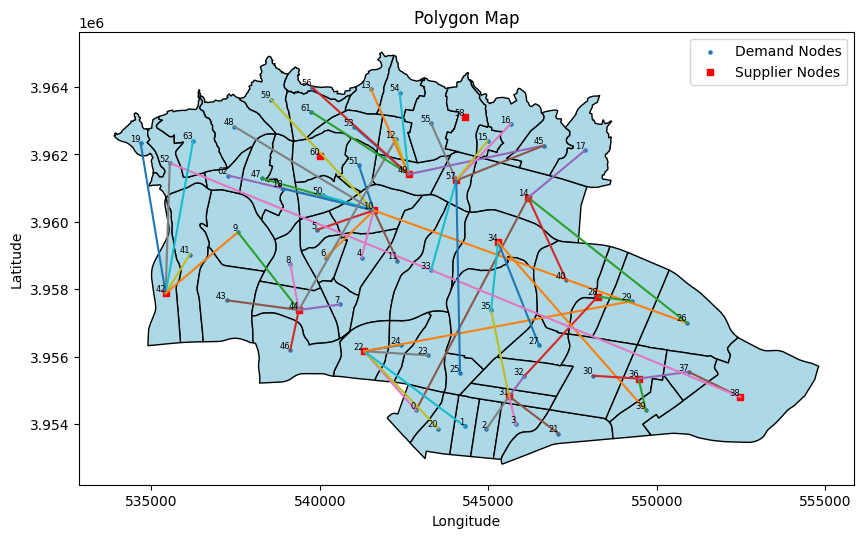

In [13]:
def chromosomplot(bestsolution):
    
# display shp file
    shapefile_path = "C:\\Users\\Amir\\Desktop\\SDSS-Project\\Data\\Mahallat\\Reg1_3_4.shp"
    polygons = gpd.read_file(shapefile_path)
    # print(polygons.head())
    polygons.plot(edgecolor='black', facecolor='lightblue', figsize=(10, 8))
    plt.title("Polygon Map")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

# display nodes
    x_d = []
    y_d = []
    x_s = []
    y_s = []
    for i in demand_nodes_index:
        x_d.append(x_nodes[i])
        y_d.append(y_nodes[i])
    plt.scatter(x_d, y_d, s=5)
    for i in supplier_nodes_index:
        x_s.append(x_nodes[i])
        y_s.append(y_nodes[i])
    plt.scatter(x_s, y_s, c='r', s=15, marker='s')
    plt.legend(["Demand Nodes","Supplier Nodes"])
    
    for n, txt in enumerate(range(No_nodes)):
        plt.text(x_nodes[n], y_nodes[n], n, fontsize=6, ha='right', va='bottom')
    
# display allocating nodes
    d_supp = np.array([v_demands[s] for s in supplier_nodes_index])
    c_supp = np.array([i*V  for i in best_solution[No_demandNodes:]]) - d_supp
    d = np.array([v_demands[i] for i in demand_nodes_index])
    j = 0
    end = False
    for i in range(No_supplierNodes):
        x = []
        y = []
        print(f"c_supp = {c_supp} \n d = {d} \n")
        while c_supp[i] >= d[j]:
            c_supp[i] -= d[j]
            d[j] = 0
            print(f"c_supp = {c_supp} \n d = {d} \n")
            x.append(x_nodes[supplier_nodes_index[i]])
            y.append(y_nodes[supplier_nodes_index[i]])
            x.append(x_nodes[bestsolution[j]])
            y.append(y_nodes[bestsolution[j]])
            plt.plot(x,y)
            x= []
            y = []
            j += 1
            if j == No_demandNodes:
                end = True
                break
        if end == True:
            break
        d[j] -= c_supp[i]
        c_supp[i] = 0
        print(f"c_supp = {c_supp} \nd = {d} \n")
        x.append(x_nodes[supplier_nodes_index[i]])
        y.append(y_nodes[supplier_nodes_index[i]])
        x.append(x_nodes[bestsolution[j]])
        y.append(y_nodes[bestsolution[j]])
        plt.plot(x,y)
    plt.figure(1)
    plt.show()
chromosomplot(best_solution)    

In [14]:
print(Population)

[[53, 6, 47, 5, 62, 11, 4, 48, 59, 50, 18, 26, 40, 17, 0, 23, 20, 1, 24, 29, 32, 21, 3, 2, 35, 27, 39, 30, 37, 52, 41, 63, 19, 9, 46, 7, 43, 8, 12, 54, 51, 13, 61, 56, 45, 16, 55, 15, 33, 25, 13, 2, 4, 4, 5, 6, 4, 3, 7, 5, 4, 5, 3, 3], [51, 6, 47, 5, 62, 11, 4, 48, 59, 50, 18, 26, 40, 17, 0, 23, 20, 1, 24, 29, 32, 21, 3, 2, 35, 27, 39, 30, 37, 52, 41, 63, 19, 61, 46, 7, 43, 8, 12, 54, 53, 13, 9, 45, 56, 16, 55, 15, 33, 25, 13, 2, 4, 4, 5, 6, 4, 3, 7, 5, 4, 5, 3, 3], [51, 6, 47, 5, 62, 11, 4, 48, 13, 50, 18, 26, 3, 17, 0, 23, 20, 1, 24, 29, 32, 21, 40, 2, 35, 27, 39, 30, 37, 52, 41, 63, 19, 9, 46, 7, 43, 8, 12, 54, 53, 59, 61, 56, 45, 16, 55, 15, 33, 25, 13, 2, 4, 4, 5, 6, 4, 3, 7, 5, 4, 5, 3, 3], [51, 6, 47, 5, 62, 11, 4, 48, 59, 50, 18, 26, 40, 17, 0, 23, 20, 1, 24, 29, 15, 21, 3, 2, 35, 27, 39, 30, 37, 52, 41, 63, 19, 9, 46, 7, 43, 8, 12, 54, 53, 13, 61, 56, 45, 16, 55, 32, 33, 25, 13, 2, 4, 4, 5, 6, 4, 3, 7, 5, 4, 5, 3, 3], [51, 6, 47, 5, 62, 11, 4, 48, 13, 50, 18, 26, 40, 17, 0, 23

(56, 64)
0.56
